In [ ]:
""" 

DESCRIPTION

1. Evaluate MERRA2 snowfall data using SUMup dataset.

"""

In [31]:
# Import modules
import xarray as xr
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.offsetbox import AnchoredText

# Define path
path = '/Users/jryan4/Dropbox (University of Oregon)/research/snowfall/data/'

In [4]:
# Read SUMup data
sumup = pd.read_csv(path + 'sumup/SUMup_dataset_july2018_accumulation_on_land_ice.csv')

# Read MERRA data
merra = xr.open_dataset(path + 'merra_accumulation_J-J_1980-2021.nc')

In [5]:
# Filter Greenland
sumup = sumup[sumup['lat'] > 0]

In [6]:
sumup['start_year'][sumup['start_year'] == -9999] = np.nan
sumup['stop_year'][sumup['stop_year'] == -9999] = np.nan
sumup['year'][sumup['year'] == -9999] = np.nan

In [7]:
# Group by lat and lon
unique_cores = sumup.groupby(['lat', 'lon']).size().reset_index()
unique_cores.columns = ['lat','lon','count']

In [8]:
merra_acc_all = []
core_acc_all = []
period_all = []

for j in range(unique_cores.shape[0]):
    #print('Processing %.0f out of %.0f' % (j, unique_cores.shape[0]))
    # Index by individual core
    core = sumup[(sumup['lat'] == unique_cores['lat'].iloc[j]) & (sumup['lon'] == unique_cores['lon'].iloc[j])]

    # Check to see if core represents 'year' or 'start and stop year'
    merra_acc = []
    core_acc = []
    period = []

    if np.isfinite(core['year']).sum() > np.isfinite(core['start_year']).sum():
        period.append(0)
        index_year = core[np.isfinite(core['year']) & (core['year'] > 1980)].index

        for idx in index_year:

            abslat = np.abs(merra['latitude'] - core.loc[idx]['lat'])
            abslon = np.abs(merra['longitude'] - core.loc[idx]['lon'])
            c = np.maximum(abslon, abslat)
            x, y = np.where(c == np.min(c))
            grid_acc = merra['acc'][x[0], y[0]]

            merra_acc.append(grid_acc[np.argmin(np.abs(core.loc[idx]['year'] - merra['z'].values))].values)
            core_acc.append(core.loc[idx]['accumulation'])

    if np.isfinite(core['start_year']).sum() > np.isfinite(core['year']).sum():
        period.append(1)
        index_year = core[np.isfinite(core['start_year']) & (core['start_year'] > 1980)].index

        for idx in index_year:
            abslat = np.abs(merra['latitude'] - core.loc[idx]['lat'])
            abslon = np.abs(merra['longitude'] - core.loc[idx]['lon'])
            c = np.maximum(abslon, abslat)
            x, y = np.where(c == np.min(c))
            grid_acc = merra['acc'][x[0], y[0]]

            start = np.argmin(np.abs(core.loc[idx]['start_year'] - merra['z'].values))
            stop = np.argmin(np.abs(core.loc[idx]['stop_year'] - merra['z'].values))

            merra_acc.append(grid_acc[start:stop].mean().values)
            core_acc.append(core.loc[idx]['accumulation'])
    
    merra_acc_all.append(merra_acc)
    core_acc_all.append(core_acc)
    period_all.append(period)
   

In [9]:
flat_merra = [item for sublist in merra_acc_all for item in sublist]
flat_core = [item for sublist in core_acc_all for item in sublist]

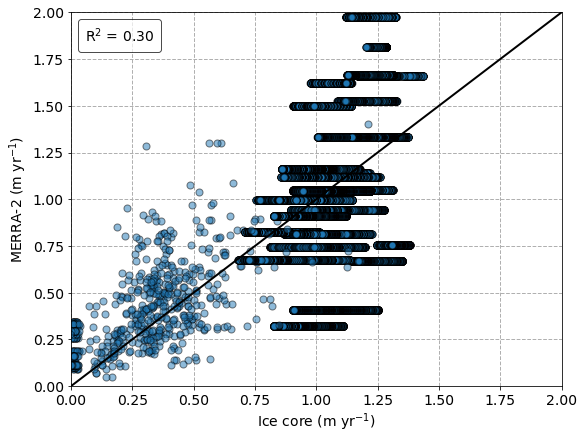

In [40]:
s1, i1, r1, p1, e1 = stats.linregress(flat_core, flat_merra)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), layout='constrained')
ax1.scatter(flat_core, flat_merra, zorder=2, s=50, edgecolor='k', alpha=0.5)
ax1.plot([0, 2], [0,2], color='k', lw=2)
ax1.grid(ls='dashed', lw=1, zorder=1)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlabel('Ice core (m yr$^{-1}$)', fontsize=14)
ax1.set_ylabel('MERRA-2 (m yr$^{-1}$)', fontsize=14)
ax1.set_xlim(0, 2)
ax1.set_ylim(0, 2)
textstr = f'R$^2$ = {r1**2:.2f}'
text_box = AnchoredText(textstr, frameon=True, loc=2, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax1.add_artist(text_box)
plt.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/snowfall/figures/merra_vs_sumup.png', dpi=200)

In [47]:
core

,date,lat,lon,start_year,stop_year,year,accumulation,error,elevation,radar_horizontal_resolution,method,name,citation
26199,19970000,76.0,-53.0,NaN,NaN,1996.0,0.464,-9999.0,2200.0,-9999,1,40,8
26200,19970000,76.0,-53.0,NaN,NaN,1995.0,0.352,-9999.0,2200.0,-9999,1,40,8
26201,19970000,76.0,-53.0,NaN,NaN,1994.0,0.422,-9999.0,2200.0,-9999,1,40,8
26202,19970000,76.0,-53.0,NaN,NaN,1993.0,0.307,-9999.0,2200.0,-9999,1,40,8
26203,19970000,76.0,-53.0,NaN,NaN,1992.0,0.358,-9999.0,2200.0,-9999,1,40,8
26204,19970000,76.0,-53.0,NaN,NaN,1991.0,0.227,-9999.0,2200.0,-9999,1,40,8
26205,19970000,76.0,-53.0,NaN,NaN,1990.0,0.406,-9999.0,2200.0,-9999,1,40,8
26206,19970000,76.0,-53.0,NaN,NaN,1989.0,0.313,-9999.0,2200.0,-9999,1,40,8
26207,19970000,76.0,-53.0,NaN,NaN,1988.0,0.380,-9999.0,2200.0,-9999,1,40,8
26208,19970000,76.0,-53.0,NaN,NaN,1987.0,0.279,-9999.0,2200.0,-9999,1,40,8


In [46]:
index_year

Int64Index([26199, 26200, 26201, 26202, 26203, 26204, 26205, 26206, 26207,
            26208, 26209, 26210, 26211, 26212, 26213, 26214, 26220, 26221,
            26222, 26223],
           dtype='int64')

In [42]:
df = core.loc[index_year]
df.set_index('year', inplace=True)
df.sort_index(inplace=True)


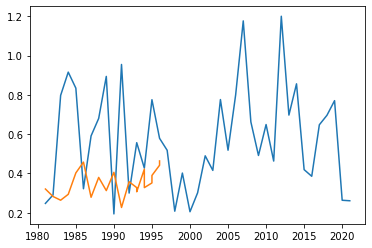

In [45]:
plt.plot(np.arange(1981, 2022, 1), merra['acc'][x[0], y[0], :])
plt.plot(df.index, df['accumulation'])

SyntaxError: unexpected EOF while parsing (25669177.py, line 1)